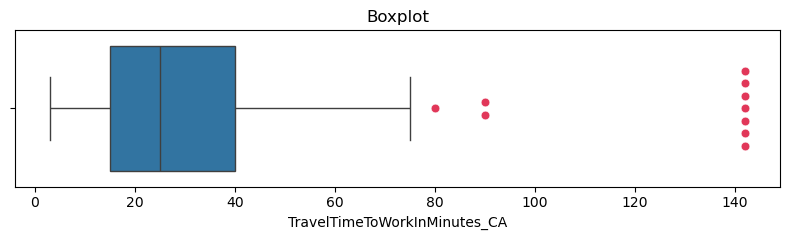

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- config ---
df = pd.read_csv("/Users/adityagarg/Downloads/AdityaGarg_Unit One Project Data - CA_Data.csv")     # change to your CSV path
point_size = 40
stack_spacing = 0.08           # vertical spacing between stacked outlier dots
dot_color = "crimson"
alpha = 0.85

# --- load & prep ---
s = pd.to_numeric(df.iloc[:, 0], errors="coerce").dropna().values

# --- fences (1.5*IQR rule) ---
Q1 = np.percentile(s, 25)
Q3 = np.percentile(s, 75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# --- identify outliers ---
outliers = s[(s < lower_fence) | (s > upper_fence)]

# --- plot: horizontal boxplot without fliers ---
plt.figure(figsize=(8, 2.5))
ax = sns.boxplot(x=s, showfliers=False)
ax.set_title("Boxplot")
ax.set_xlabel(df.columns[0])

# --- overlay ONLY the outliers, stacked vertically at each x value ---
if outliers.size > 0:
    # group duplicates so identical values stack
    unique_vals, counts = np.unique(np.round(outliers, 12), return_counts=True)  # rounding guards FP noise
    for xv, c in zip(unique_vals, counts):
        # center the stack around y=0 (the box's category line)
        # positions like [-2, -1, 0, 1, 2] * spacing for c=5
        offsets = (np.arange(c) - (c - 1) / 2.0) * stack_spacing
        ys = np.zeros(c) + offsets  # base y=0 for the single category
        xs = np.full(c, xv)
        ax.scatter(xs, ys, s=point_size, color=dot_color, alpha=alpha, zorder=3, edgecolors="white", linewidths=0.6)

# make sure the stacked dots are visible
ax.set_ylim(-0.5, 0.5)  # widen vertical padding around the single category
plt.tight_layout()
plt.show()

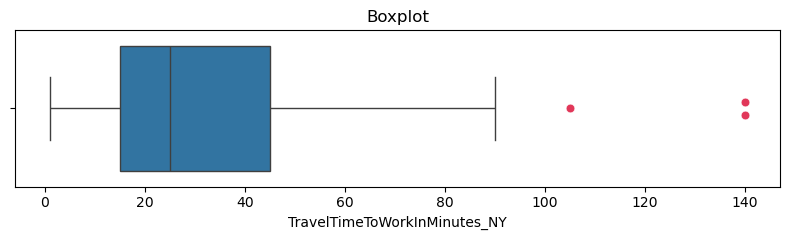

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- config ---
df = pd.read_csv("/Users/adityagarg/Downloads/AdityaGarg_Unit One Project Data - NY_Data.csv")     # change to your CSV path
point_size = 40
stack_spacing = 0.08           # vertical spacing between stacked outlier dots
dot_color = "crimson"
alpha = 0.85

# --- load & prep ---
s = pd.to_numeric(df.iloc[:, 0], errors="coerce").dropna().values

# --- fences (1.5*IQR rule) ---
Q1 = np.percentile(s, 25)
Q3 = np.percentile(s, 75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# --- identify outliers ---
outliers = s[(s < lower_fence) | (s > upper_fence)]

# --- plot: horizontal boxplot without fliers ---
plt.figure(figsize=(8, 2.5))
ax = sns.boxplot(x=s, showfliers=False)
ax.set_title("Boxplot")
ax.set_xlabel(df.columns[0])

# --- overlay ONLY the outliers, stacked vertically at each x value ---
if outliers.size > 0:
    # group duplicates so identical values stack
    unique_vals, counts = np.unique(np.round(outliers, 12), return_counts=True)  # rounding guards FP noise
    for xv, c in zip(unique_vals, counts):
        # center the stack around y=0 (the box's category line)
        # positions like [-2, -1, 0, 1, 2] * spacing for c=5
        offsets = (np.arange(c) - (c - 1) / 2.0) * stack_spacing
        ys = np.zeros(c) + offsets  # base y=0 for the single category
        xs = np.full(c, xv)
        ax.scatter(xs, ys, s=point_size, color=dot_color, alpha=alpha, zorder=3, edgecolors="white", linewidths=0.6)

# make sure the stacked dots are visible
ax.set_ylim(-0.5, 0.5)  # widen vertical padding around the single category
plt.tight_layout()
plt.show()